Все задание https://drive.google.com/drive/folders/1ys3OIOrUNgSbmZw2VdBOi4tpohY7vahW?usp=sharing



```
Задание 3.  В пакете для третьего задания три файла:
В файле Tariff_plans_change.csv содержатся выборочные данные о транзакциях, связанных с подключениями и отключениями тарифных планов абонентами, которые меняли тарифные планы в первом полугодии 2017 года: 
SUBSCRIBER_ID	 -  условный идентификатор абонента
TARIFF_PLAN_ID – условный идентификатор тарифного плана	
START_DTTM	 - дата и время подключения плана
END_DTTM – дата и время отключения (значение $null$ означает, что план актуален на текущий момент).
В файле Charges.csv содержатся помесячные исторические данные об общих расходах абонентов на мобильную связь:
SUBSCRIBER_ID	 -  условный идентификатор абонента
BILL_MONTH – биллинговый период в формате YYYY-MM-01 (например, строки со значением ‘2016-01-01’ содержат данные о расходах и потреблении за январь 2016 года)
CHARGES – общая сумма  счета за услуги связи
В файле Suspended.csv содержатся исторические данные о блокировках абонентов в транзакционной форме:
SUBSCRIBER_ID	 -  условный идентификатор абонента
START_DT - дата начала блокировки
END_DT – дата окончания блокировки (значение $null$ означает, что абонент остается блокированным на текущий момент).
Необходимо исследовать следующие вопросы:
Направления смен тарифных планов: с каких тарифных планов и на какие шли  наибольшие перетоки? Визуализировать потоки миграций на диаграмме. 
Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.
Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.

Ход и результаты выполнения заданий оформить в виде презентации. Приложить исходники с кодом.

```



In [ ]:
import pandas as pd
import numpy as np

https://drive.google.com/file/d/11zxUCzKzYBr-Itjqw3EoRIVwIj9QQLRF/view?usp=sharing

In [ ]:
!gdown --id 11zxUCzKzYBr-Itjqw3EoRIVwIj9QQLRF

Downloading...
From: https://drive.google.com/uc?id=11zxUCzKzYBr-Itjqw3EoRIVwIj9QQLRF
To: /content/task_3.zip
100% 819k/819k [00:00<00:00, 5.01MB/s]


In [ ]:
! unzip task_3.zip

Archive:  task_3.zip
replace Charges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('/content/Tariff_plans_change.csv')

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,$null$
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55
12341,5988,4,2017-05-22 16:36:56,$null$
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32


In [ ]:
df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].count().sort_values(ascending=False)

SUBSCRIBER_ID
5929    18
5905    16
2144     8
377      6
478      6
        ..
3935     2
3936     2
3937     2
3938     2
1        2
Name: TARIFF_PLAN_ID, Length: 5989, dtype: int64

In [ ]:
df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].count().value_counts()

2     5718
3      233
4       20
6       12
5        3
18       1
16       1
8        1
Name: TARIFF_PLAN_ID, dtype: int64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
one_switch = df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].count().reset_index()

In [ ]:
one_switch = one_switch[one_switch['TARIFF_PLAN_ID'] == 2]

In [ ]:
len(df)

12344

In [ ]:
df = df.merge(one_switch['SUBSCRIBER_ID'],how='inner',on='SUBSCRIBER_ID')

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
...,...,...,...,...
11431,5987,3,2017-05-23 13:07:57,$null$
11432,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55
11433,5988,4,2017-05-22 16:36:56,$null$
11434,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32


In [ ]:
df['TARIFF_PLAN_ID'].value_counts()

5    4746
3    2746
1    2022
4    1322
2     600
Name: TARIFF_PLAN_ID, dtype: int64

In [ ]:
clnt_tariff = df.sort_values(['SUBSCRIBER_ID','START_DTTM']).groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].apply(list).reset_index()

In [ ]:
clnt_tariff.sample(5)

,SUBSCRIBER_ID,TARIFF_PLAN_ID
2009,2097,"[1, 5]"
5303,5551,"[4, 5]"
1762,1841,"[1, 2]"
2623,2743,"[1, 5]"
2438,2547,"[1, 5]"


In [ ]:
df[df['SUBSCRIBER_ID']==1707]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
3270,1707,3,2009-05-16 15:35:12,2017-05-04 20:33:03
3271,1707,5,2017-05-04 20:33:04,$null$


In [ ]:
clnt_tariff

,SUBSCRIBER_ID,TARIFF_PLAN_ID
0,1,"[2, 3]"
1,2,"[1, 5]"
2,3,"[1, 5]"
3,4,"[3, 5]"
4,5,"[1, 5]"
...,...,...
5713,5985,"[4, 5]"
5714,5986,"[5, 1]"
5715,5987,"[5, 3]"
5716,5988,"[1, 4]"


In [ ]:
clnt_tariff[['t1','t2']] = pd.DataFrame(clnt_tariff['TARIFF_PLAN_ID'].tolist(), index = clnt_tariff.index)

In [ ]:
clnt_tariff

,SUBSCRIBER_ID,TARIFF_PLAN_ID,t1,t2
0,1,"[2, 3]",2,3
1,2,"[1, 5]",1,5
2,3,"[1, 5]",1,5
3,4,"[3, 5]",3,5
4,5,"[1, 5]",1,5
...,...,...,...,...
5713,5985,"[4, 5]",4,5
5714,5986,"[5, 1]",5,1
5715,5987,"[5, 3]",5,3
5716,5988,"[1, 4]",1,4


In [ ]:
switch = clnt_tariff.groupby(['t1','t2'])['SUBSCRIBER_ID'].count().reset_index()

In [ ]:
switch[['t1','t2']] = switch[['t1','t2']].astype('str')

In [ ]:
switch['t1'] = '1_' + switch['t1']

In [ ]:
switch['t2'] = '2_' + switch['t2']

In [ ]:
switch

,t1,t2,SUBSCRIBER_ID
0,1_1,2_2,5
1,1_1,2_3,46
2,1_1,2_4,351
3,1_1,2_5,1544
4,1_2,2_1,13
5,1_2,2_3,15
6,1_2,2_4,139
7,1_2,2_5,406
8,1_3,2_1,17
9,1_3,2_2,7


In [ ]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [ ]:
param = genSankey(switch,cat_cols=['t1','t2'],value_cols='SUBSCRIBER_ID')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = param['data'][0]['node']['label'],
      color = "blue"
    ),
    link = dict(
      source = param['data'][0]['link']['source'], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = param['data'][0]['link']['target'],
      value = param['data'][0]['link']['value']
  )
    )])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

In [ ]:
data['data'][0]['link']['source']

[0,
 1,
 1,
 1,
 1,
 6,
 7,
 8,
 10,
 9,
 11,
 11,
 11,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 23,
 25,
 5,
 5,
 5,
 5,
 5,
 27,
 17,
 17,
 28,
 29,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 34,
 24,
 35,
 35,
 36,
 38,
 37,
 39,
 39,
 40,
 40,
 41,
 42,
 43,
 43,
 4,
 4,
 4,
 26,
 26,
 26,
 44,
 45,
 46,
 47,
 35,
 35]

In [ ]:
data['data'][0]['link']['target']

[1,
 2,
 3,
 4,
 5,
 2,
 4,
 9,
 9,
 4,
 12,
 13,
 14,
 16,
 14,
 17,
 12,
 18,
 19,
 13,
 3,
 20,
 21,
 22,
 24,
 24,
 13,
 3,
 26,
 19,
 12,
 15,
 28,
 3,
 18,
 15,
 12,
 30,
 18,
 31,
 32,
 19,
 33,
 20,
 1,
 5,
 26,
 26,
 37,
 37,
 2,
 4,
 1,
 14,
 13,
 15,
 14,
 42,
 41,
 19,
 26,
 12,
 15,
 3,
 11,
 15,
 1,
 15,
 15,
 26,
 26]

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
...,...,...,...,...
11431,5987,3,2017-05-23 13:07:57,$null$
11432,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55
11433,5988,4,2017-05-22 16:36:56,$null$
11434,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32


# Средние чеки

In [ ]:
df = pd.read_csv('/content/Tariff_plans_change.csv')

In [ ]:
df.dtypes

SUBSCRIBER_ID      int64
TARIFF_PLAN_ID     int64
START_DTTM        object
END_DTTM          object
dtype: object

In [ ]:
df['START_DTTM'] = pd.to_datetime(df['START_DTTM'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['END_DTTM'].replace('$null$','9999-01-01')

0        2017-03-11 14:24:17
1                 9999-01-01
2        2017-06-29 12:39:58
3                 9999-01-01
4        2017-04-14 12:00:59
                ...         
12339             9999-01-01
12340    2017-05-22 16:36:55
12341             9999-01-01
12342    2017-05-25 20:12:32
12343             9999-01-01
Name: END_DTTM, Length: 12344, dtype: object

In [ ]:
df['END_DTTM'] = pd.to_datetime(df['END_DTTM'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [ ]:
df.dtypes

SUBSCRIBER_ID              int64
TARIFF_PLAN_ID             int64
START_DTTM        datetime64[ns]
END_DTTM          datetime64[ns]
dtype: object

In [ ]:
t = pd.DataFrame({'col1':[1,1,2]})

In [ ]:
t['col1'].rank(method='first')

0    1.0
1    2.0
2    3.0
Name: col1, dtype: float64

In [ ]:
df['tariff_number'] = df.groupby('SUBSCRIBER_ID')['START_DTTM'].rank(method='first')

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,1.0
1,1,3,2017-03-11 14:24:18,NaT,2.0
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,1.0
3,2,5,2017-06-29 12:39:59,NaT,2.0
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,1.0
...,...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,NaT,2.0
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,1.0
12341,5988,4,2017-05-22 16:36:56,NaT,2.0
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,1.0


In [ ]:
df.pivot_table(index='SUBSCRIBER_ID',columns='tariff_number',values='TARIFF_PLAN_ID')

tariff_number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
SUBSCRIBER_ID,,,,,,,,,,,,,,,,,,
1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5986,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5987,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['start_dt'] = df['START_DTTM'].astype('str')

In [ ]:
df.pivot_table(index='SUBSCRIBER_ID',columns='tariff_number',values='start_dt',aggfunc='sum')

tariff_number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
SUBSCRIBER_ID,,,,,,,,,,,,,,,,,,
1,2013-11-22 21:10:08,2017-03-11 14:24:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-05 16:36:34,2017-06-29 12:39:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-05-06 19:17:46,2017-04-14 12:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-27 23:03:51,2017-01-09 19:27:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-02-06 08:07:15,2017-05-08 12:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,2017-04-14 14:01:33,2017-06-17 15:00:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5986,2017-05-01 11:28:36,2017-06-27 17:45:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5987,2017-05-08 17:27:21,2017-05-23 13:07:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.Series.sum(pd.Series([1,2]))

3

In [ ]:
pd.Series.sum(pd.Series(['gleb','hleb']))

'glebhleb'

Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.

In [ ]:
df['START_DTTM'].agg(['min','max'])

min   1999-07-12 12:55:54
max   2017-06-30 23:51:34
Name: START_DTTM, dtype: datetime64[ns]

In [ ]:
df['start_month'] = df['START_DTTM'].to_numpy().astype('datetime64[M]')

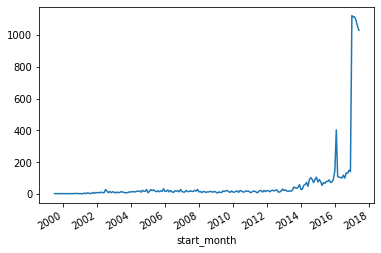

In [ ]:
df.groupby('start_month')['SUBSCRIBER_ID'].count().plot()

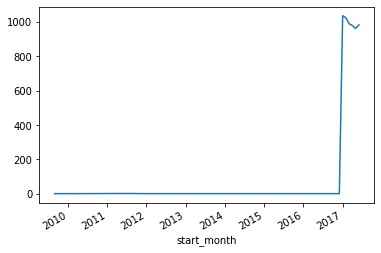

In [ ]:
df[df['tariff_number'] == 2].groupby('start_month')['SUBSCRIBER_ID'].count().plot()

In [ ]:
df[df['tariff_number'] == 2]['start_month'].value_counts()

2017-01-01    1037
2017-02-01    1023
2017-03-01     990
2017-06-01     983
2017-04-01     979
2017-05-01     962
2011-08-01       2
2012-01-01       1
2014-06-01       1
2009-09-01       1
2014-07-01       1
2010-04-01       1
2016-12-01       1
2016-03-01       1
2016-06-01       1
2013-02-01       1
2016-09-01       1
2016-08-01       1
2016-11-01       1
2015-04-01       1
Name: start_month, dtype: int64

In [ ]:
ch = pd.read_csv('Charges.csv')

In [ ]:
ch

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610
...,...,...,...
112590,4992,2016-10-01,8.078
112591,4747,2016-10-01,4.862
112592,4992,2016-11-01,9.978
112593,4747,2017-06-01,5.182


In [ ]:
ch['BILL_MONTH'].value_counts()

2017-09-01    5989
2017-11-01    5989
2017-08-01    5989
2017-10-01    5989
2017-12-01    5989
2017-07-01    5989
2017-06-01    5989
2017-05-01    5989
2017-04-01    5985
2017-03-01    5980
2017-02-01    5959
2017-01-01    5948
2016-12-01    5931
2016-11-01    5905
2016-10-01    5874
2016-09-01    5836
2016-08-01    5800
2016-07-01    5756
2016-06-01    5709
Name: BILL_MONTH, dtype: int64

In [ ]:
abons = df[df['tariff_number'] == 2].copy()

In [ ]:
first_tariff = df[df['tariff_number'] == 1][['SUBSCRIBER_ID','TARIFF_PLAN_ID','START_DTTM']].copy()

In [ ]:
first_tariff.columns

Index(['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'START_DTTM'], dtype='object')

In [ ]:
first_tariff.columns = ['SUBSCRIBER_ID', 'TARIFF_PLAN_ID_FIRST', 'START_DTTM_FIRST']

In [ ]:
abons = abons.merge(first_tariff,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15
...,...,...,...,...,...,...,...,...,...
5984,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33
5985,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36
5986,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21
5987,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53


In [ ]:
ch['BILL_MONTH'] = pd.to_datetime(ch['BILL_MONTH'],format='%Y-%m-%d')

In [ ]:
ch[ch['SUBSCRIBER_ID'] == 4741]

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
62,4741,2016-07-01,4.106
124,4741,2016-12-01,5.078
186,4741,2017-12-01,5.004
248,4741,2017-08-01,5.044
310,4741,2017-02-01,4.572
372,4741,2017-07-01,5.024
434,4741,2016-09-01,4.232
496,4741,2017-11-01,5.686
558,4741,2016-08-01,6.896


In [ ]:
abons[abons['SUBSCRIBER_ID'] == 4741]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST
4740,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20


03,04,05 <- '2017-06-1' -> 07,08,09

Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.

In [ ]:
ch

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610
...,...,...,...
112590,4992,2016-10-01,8.078
112591,4747,2016-10-01,4.862
112592,4992,2016-11-01,9.978
112593,4747,2017-06-01,5.182


In [ ]:
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15
...,...,...,...,...,...,...,...,...,...
5984,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33
5985,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36
5986,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21
5987,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53


## Джойню счета

In [ ]:
len(ch[(ch['CHARGES']>0)&(ch['CHARGES']<20)]) / len(ch)

0.9481238065633465

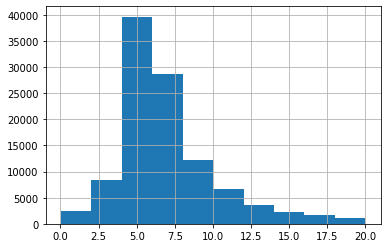

In [ ]:
ch[(ch['CHARGES']>0)&(ch['CHARGES']<20)]['CHARGES'].hist()

In [ ]:
ch = ch[(ch['CHARGES']>0)&(ch['CHARGES']<20)]

In [ ]:
abons_ch = abons.merge(ch,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons_ch['month_between'] = round((abons_ch['start_month'] - abons_ch['BILL_MONTH']).dt.days / 30)

In [ ]:
abons_ch[abons_ch['SUBSCRIBER_ID']== 4741].sort_values('month_between')

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,BILL_MONTH,CHARGES,month_between
86250,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-12-01,5.004,-6.0
86255,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-11-01,5.686,-5.0
86258,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-10-01,4.984,-4.0
86262,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-09-01,5.610,-3.0
86251,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-08-01,5.044,-2.0
86253,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-07-01,5.024,-1.0
86264,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-05-01,4.964,1.0
86257,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-04-01,4.852,2.0
86247,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-03-01,4.572,3.0
86252,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-02-01,4.572,4.0


In [ ]:
prev = (abons_ch[abons_ch['month_between'].isin([1,2,3])]
        .groupby('SUBSCRIBER_ID')['CHARGES']
        .agg(['count','sum','mean']).reset_index())

In [ ]:
after = (abons_ch[abons_ch['month_between'].isin([-1,-2,-3])]
         .groupby('SUBSCRIBER_ID')['CHARGES']
         .agg(['count','sum','mean']).reset_index())

In [ ]:
prev.columns = ['SUBSCRIBER_ID', 'count_prev', 'sum_prev', 'mean_prev']

In [ ]:
after.columns = ['SUBSCRIBER_ID', 'count_after', 'sum_after', 'mean_after']

In [ ]:
abons = abons.merge(prev,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons = abons.merge(after,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34,3.0,16.775,5.591667,3.0,15.396,5.132000
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46,3.0,15.579,5.193000,3.0,14.992,4.997333
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51,3.0,20.010,6.670000,3.0,14.436,4.812000
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15,3.0,11.161,3.720333,3.0,14.364,4.788000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33,2.0,11.084,5.542000,3.0,15.409,5.136333
5985,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36,1.0,14.359,14.359000,3.0,45.613,15.204333
5986,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21,NaN,NaN,NaN,3.0,11.619,3.873000
5987,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53,NaN,NaN,NaN,3.0,28.654,9.551333


Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.

In [ ]:
t = (abons[(abons['count_prev']==3)&(abons['count_after']==3)]
     [['mean_prev','mean_after']].agg(['mean','median']))

In [ ]:
t['%'] = (t['mean_after'] - t['mean_prev'])/t['mean_prev']

In [ ]:
t

,mean_prev,mean_after,%
mean,7.427064,6.183555,-0.167429
median,7.123000,5.512833,-0.226052


In [ ]:
t = (abons[(abons['count_prev']==3)&(abons['count_after']==3)]
     .groupby('start_month')[['mean_prev','mean_after']]
     .agg(['count','mean','median']))

In [ ]:
t['change'] = (t['mean_after']['mean'] - t['mean_prev']['mean'])/t['mean_prev']['mean']

In [ ]:
t

mean_prev                      ... mean_after              change
                count      mean    median  ...       mean    median          
start_month                                ...                               
2017-01-01        864  7.279306  6.915667  ...   5.709759  5.089000 -0.215618
2017-02-01        844  7.095130  6.900167  ...   5.844523  5.282333 -0.176263
2017-03-01        805  7.041984  6.854333  ...   6.031951  5.467333 -0.143430
2017-04-01        799  7.491715  7.212333  ...   6.372004  5.681333 -0.149460
2017-05-01        774  7.608230  7.238000  ...   6.635858  5.780667 -0.127805
2017-06-01        804  8.081201  7.725000  ...   6.577698  5.779833 -0.186049

[6 rows x 7 columns]

In [ ]:
 t = (abons[(abons['count_prev']==3)&(abons['count_after']==3)]
      .groupby(['TARIFF_PLAN_ID_FIRST','TARIFF_PLAN_ID'])
      [['mean_prev','mean_after']]
      .agg(['count','median']).reset_index())

In [ ]:
t.columns = ['TARIFF_PLAN_ID_FIRST','TARIFF_PLAN_ID','cnt','before','_','after']

In [ ]:
t['chage'] = (t['after'] - t['before'])/t['before']

In [ ]:
t.sort_values('cnt',ascending=False)

,TARIFF_PLAN_ID_FIRST,TARIFF_PLAN_ID,cnt,before,_,after,chage
12,3,5,2040,7.786833,2040,5.692667,-0.268937
3,1,5,1243,6.557000,1243,5.500333,-0.161151
7,2,5,348,5.738833,348,5.577167,-0.028171
17,4,5,332,5.434000,332,5.610667,0.032511
2,1,4,314,5.237000,314,3.294833,-0.370855
11,3,4,264,7.010500,264,4.617000,-0.341416
6,2,4,135,3.126333,135,3.655667,0.169314
1,1,3,40,7.460833,40,7.776333,0.042288
13,4,1,26,6.487167,26,6.053000,-0.066927
8,3,1,25,7.569000,25,7.362000,-0.027348


# Блокировки

In [ ]:
suspended = pd.read_csv('/content/Suspended.csv')

In [ ]:
suspended['START_DT'] = pd.to_datetime(suspended['START_DT'],
                                       format='%Y-%m-%d',
                                       errors='coerce')

In [ ]:
suspended['END_DT'] = pd.to_datetime(suspended['END_DT'],
                                     format='%Y-%m-%d',
                                     errors='coerce')

In [ ]:
suspended

,SUBSCRIBER_ID,START_DT,END_DT,STATUS
0,5195,2017-12-27,2017-12-27,Suspended
1,5198,2017-04-18,2017-04-18,Suspended
2,381,2017-04-18,2017-04-20,Suspended
3,3500,2017-12-21,NaT,Suspended
4,3302,2016-08-23,2016-09-07,Suspended
...,...,...,...,...
4058,2166,2016-07-23,2016-07-24,Suspended
4059,2166,2016-07-02,2016-07-05,Suspended
4060,2166,2016-06-18,2016-06-21,Suspended
4061,2166,2016-06-11,2016-06-11,Suspended


In [ ]:
suspended['STATUS'].value_counts()

Suspended    4063
Name: STATUS, dtype: int64

In [ ]:
suspended['start_month_sus'] = suspended['START_DT'].to_numpy().astype('datetime64[M]')

In [ ]:
abons_sus = abons.merge(suspended,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons['SUBSCRIBER_ID'].nunique()

5989

In [ ]:
suspended['SUBSCRIBER_ID'].nunique()

1310

In [ ]:
abons_sus['month_between'] = round((abons_sus['start_month'] - abons_sus['start_month_sus']).dt.days / 30)

In [ ]:
prev = (abons_sus[abons_sus['month_between'].isin([1,2,3])]
        .groupby('SUBSCRIBER_ID')['STATUS']
        .agg(['count']).reset_index())

In [ ]:
after = (abons_sus[abons_sus['month_between'].isin([-1,-2,-3])]
        .groupby('SUBSCRIBER_ID')['STATUS']
        .agg(['count']).reset_index())

In [ ]:
prev.columns = ['SUBSCRIBER_ID', 'count_prev_sus']

In [ ]:
after.columns = ['SUBSCRIBER_ID', 'count_after_sus']

In [ ]:
abons = abons.merge(prev,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons = abons.merge(after,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after,count_prev_sus,count_after_sus
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34,3.0,16.775,5.591667,3.0,15.396,5.132000,NaN,NaN
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46,3.0,15.579,5.193000,3.0,14.992,4.997333,NaN,NaN
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51,3.0,20.010,6.670000,3.0,14.436,4.812000,NaN,NaN
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15,3.0,11.161,3.720333,3.0,14.364,4.788000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33,2.0,11.084,5.542000,3.0,15.409,5.136333,1.0,2.0
5985,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36,1.0,14.359,14.359000,3.0,45.613,15.204333,NaN,NaN
5986,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21,NaN,NaN,NaN,3.0,11.619,3.873000,NaN,1.0
5987,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53,NaN,NaN,NaN,3.0,28.654,9.551333,NaN,1.0


## Проверка на вменяемость (sanity check) и выбросы


In [ ]:
df[df['SUBSCRIBER_ID'] == 5961]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month
12286,5961,5,2017-02-28 11:08:29,2017-05-04 10:06:27,1.0,2017-02-28 11:08:29,2017-02-01
12287,5961,3,2017-05-04 10:06:28,NaT,2.0,2017-05-04 10:06:28,2017-05-01


In [ ]:
abons[abons['SUBSCRIBER_ID'] == 5961]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after,count_prev_sus,count_after_sus
5960,5961,3,2017-05-04 10:06:28,NaT,2.0,2017-05-04 10:06:28,2017-05-01,5,2017-02-28 11:08:29,3.0,18.036,6.012,3.0,48.48,16.16,3.0,2.0


In [ ]:
ch[ch['SUBSCRIBER_ID'] == 5961].sort_values('BILL_MONTH')

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
25277,5961,2017-02-01,0.280
24905,5961,2017-03-01,7.864
24781,5961,2017-04-01,9.892
25029,5961,2017-06-01,18.698
25215,5961,2017-07-01,10.378
24967,5961,2017-08-01,19.404
25091,5961,2017-09-01,1.212


In [ ]:
ch[(ch['SUBSCRIBER_ID'] == 5961)&(ch['BILL_MONTH'] < '2017-05-01')]['CHARGES'].sum()

18.036

In [ ]:
ch[(ch['SUBSCRIBER_ID'] == 5961)&(ch['BILL_MONTH'] > '2017-05-01')&(ch['BILL_MONTH'] < '2017-09-01')]['CHARGES'].sum()

48.480000000000004

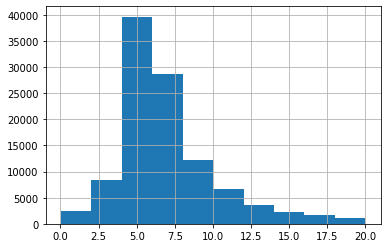

In [ ]:
ch['CHARGES'].hist()

In [ ]:
len(ch[ch['CHARGES'] < 0])

0

In [ ]:
ch[ch['CHARGES'] < 0]

,SUBSCRIBER_ID,BILL_MONTH,CHARGES


In [ ]:
abons[abons['SUBSCRIBER_ID'] == 5961]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after,count_prev_sus,count_after_sus
5960,5961,3,2017-05-04 10:06:28,NaT,2.0,2017-05-04 10:06:28,2017-05-01,5,2017-02-28 11:08:29,3.0,18.036,6.012,3.0,48.48,16.16,3.0,2.0


In [ ]:
suspended[suspended['SUBSCRIBER_ID'] == 5961].sort_values('start_month_sus')

,SUBSCRIBER_ID,START_DT,END_DT,STATUS,start_month_sus
787,5961,2017-03-17,2017-03-24,Suspended,2017-03-01
663,5961,2017-04-20,2017-05-02,Suspended,2017-04-01
725,5961,2017-04-12,2017-04-13,Suspended,2017-04-01
601,5961,2017-05-13,2017-05-17,Suspended,2017-05-01
539,5961,2017-06-08,2017-06-18,Suspended,2017-06-01
477,5961,2017-07-20,2017-08-18,Suspended,2017-07-01
415,5961,2017-09-05,NaT,Suspended,2017-09-01


## Блокировки

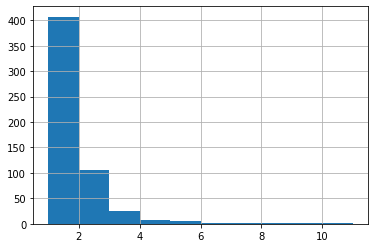

In [ ]:
abons['count_prev_sus'].hist()

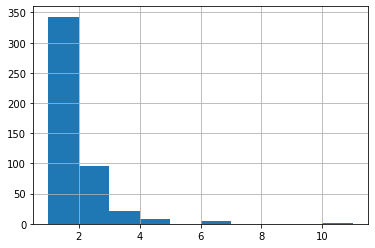

In [ ]:
abons['count_after_sus'].hist()

Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.

In [ ]:
abons.columns

Index(['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'START_DTTM', 'END_DTTM',
       'tariff_number', 'start_dt', 'start_month', 'TARIFF_PLAN_ID_FIRST',
       'START_DTTM_FIRST', 'count_prev', 'sum_prev', 'mean_prev',
       'count_after', 'sum_after', 'mean_after', 'count_prev_sus',
       'count_after_sus'],
      dtype='object')

In [ ]:
t = abons[['SUBSCRIBER_ID','count_prev_sus','count_after_sus']].count()

In [ ]:
t

SUBSCRIBER_ID      5989
count_prev_sus      558
count_after_sus     473
dtype: int64

In [ ]:
t / t['SUBSCRIBER_ID']

SUBSCRIBER_ID      1.000000
count_prev_sus     0.093171
count_after_sus    0.078978
dtype: float64

In [ ]:
abons[['SUBSCRIBER_ID','count_prev_sus','count_after_sus']].agg(['count','mean'])

,SUBSCRIBER_ID,count_prev_sus,count_after_sus
count,5989.0,558.000000,473.000000
mean,2995.0,1.455197,1.408034


In [ ]:
(1.455197 - 1.408034) / 1.455197

0.032410044825546

In [ ]:
t = (abons
     .groupby(['TARIFF_PLAN_ID_FIRST','TARIFF_PLAN_ID'])
     [['SUBSCRIBER_ID','count_prev_sus','count_after_sus']]
     .agg(['count','mean'])
     .reset_index())

In [ ]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [ ]:
t['abon_sus_change'] = (t['count_after_sus_count'] - t['count_prev_sus_count']) / t['count_prev_sus_count']

In [ ]:
t['count_sus_change'] = (t['count_after_sus_mean'] - t['count_prev_sus_mean']) / t['count_prev_sus_mean']

In [ ]:
t.sort_values('SUBSCRIBER_ID_count',ascending=False)

,TARIFF_PLAN_ID_FIRST_,TARIFF_PLAN_ID_,SUBSCRIBER_ID_count,SUBSCRIBER_ID_mean,count_prev_sus_count,count_prev_sus_mean,count_after_sus_count,count_after_sus_mean,abon_sus_change,count_sus_change
13,3,5,2340,2784.030342,196,1.464286,136,1.301471,-0.306122,-0.111191
4,1,5,1584,2794.313763,100,1.590000,86,1.523256,-0.140000,-0.041977
18,4,5,442,4493.891403,78,1.615385,69,1.463768,-0.115385,-0.093858
8,2,5,414,2772.512077,6,1.166667,19,1.421053,2.166667,0.218045
3,1,4,376,2973.933511,52,1.192308,41,1.317073,-0.211538,0.104642
12,3,4,357,3263.173669,85,1.294118,60,1.366667,-0.294118,0.056061
7,2,4,158,2914.506329,6,1.000000,23,1.521739,2.833333,0.521739
2,1,3,53,3033.396226,2,1.500000,1,1.000000,-0.500000,-0.333333
16,4,3,38,4449.631579,11,1.363636,9,1.444444,-0.181818,0.059259
21,5,3,33,3993.848485,3,2.000000,9,1.666667,2.000000,-0.166667
